In [ ]:
## 세 집단간 차이가 있는지를 확인하는 분석
## 귀무가설 - 모든 그룹의 평균이 같다
## 대립가설 - 최소한 한개 그룹이라도 평균이 다르다

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/지점별_일별판매량.csv', engine ='python')
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일자      30 non-null     int64
 1   지점A     30 non-null     int64
 2   지점B     30 non-null     int64
 3   지점C     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [ ]:
# 정규성을모든집단에 대해 정규성검사해서 정규성이 없으면 다른분석
# 모든 집단에 대해 등분산확인 후 분산이 같지않으면 다른 분석

##===>Kruskal-Wallis H Test를 수행해야 함(비모수적인방법)

In [7]:
## 데이터 분할 (결측치 해결)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

([<matplotlib.axis.XTick at 0x151e2ebf4f0>,
 [Text(1, 0, '지점A'), Text(2, 0, '지점B'), Text(3, 0, '지점C')])

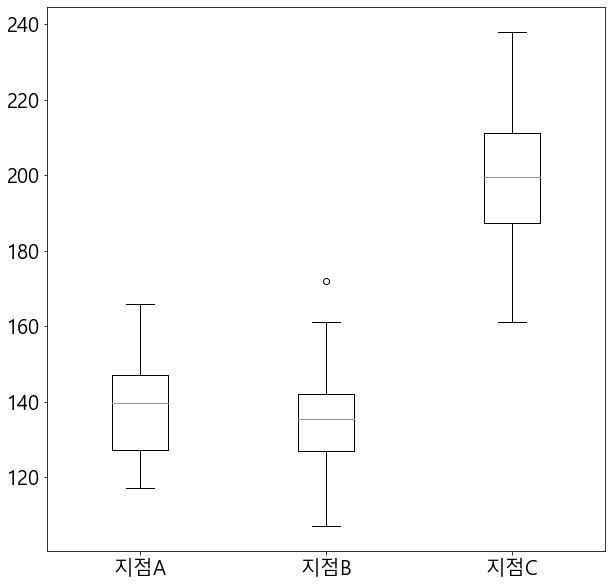

In [8]:
## 박스플롯으로 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)

plt.boxplot([A,B,C])
plt.xticks([1,2,3],['지점A','지점B','지점C'])

In [10]:
## 정규성 검정 : 세변수 모두 정규성이 있는지 확인
from scipy.stats import *
print(kstest(A,'norm'))
print(kstest(B,'norm'))
print(kstest(C,'norm'))


KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [11]:
## 등분산 검정
levene(A,B,C) ## pvalue가 0.05 보다 크므로 귀무가설 채택

LeveneResult(statistic=1.244640322359082, pvalue=0.2931218868935245)

In [12]:
##  f_oneway()
print(f_oneway(A,B,C)) 
#pvalue=1.6337420285664805e-31 -> pvalue가 거의 0에 수렴 : A,B,C의 평균은 유의한 차이가 존재
#최소한 하나의 그룹은 다른 그룹과 다르다. 어디서 차이가 있는지는 모른다

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [13]:
## 사후분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
## 데이터 구조 변형


In [14]:
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [15]:
Group = ['A'] *len(A) + ['B'] *len(B) + ['C'] *len(C)

In [16]:
Group

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [17]:
Data = A.tolist() + B.tolist() + C.tolist()
Data[:20]

[124,
 147,
 129,
 123,
 147,
 149,
 140,
 142,
 124,
 166,
 127,
 130,
 139,
 121,
 149,
 155,
 140,
 150,
 137,
 144]

In [18]:
print(pairwise_tukeyhsd(Data,Group))

# 결론 (A,B) ~ C

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


In [ ]:
###-------개별실습 htest04.csv

##  귀무가설 : 모든 그룹의 평균이 같다
##  대립가설 : 최소한 한개 그룹이라도 평균이 다르다

In [19]:
df=pd.read_csv('../data/htest04.csv', engine='python')

In [21]:
df.head()
df.tail()

,group,height
24,C,162
25,C,161
26,C,160
27,C,167
28,C,165


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   29 non-null     object
 1   height  29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [23]:
## 그룹 분리
A = df[df['group']=="A"].height
B = df[df['group']=="B"].height
C = df[df['group']=="C"].height

In [25]:
print(A,B,C)

0    175
1    180
2    172
3    182
4    185
5    171
6    161
7    179
8    168
Name: height, dtype: int64 9     174
10    171
11    182
12    183
13    189
14    178
15    179
16    185
17    188
18    181
Name: height, dtype: int64 19    171
20    168
21    166
22    158
23    171
24    162
25    161
26    160
27    167
28    165
Name: height, dtype: int64


In [26]:
print(A.mean(),B.mean(),C.mean())

174.77777777777777 181.0 164.9


([<matplotlib.axis.XTick at 0x151e4f311c0>,
 [Text(1, 0, 'A'), Text(2, 0, ' B'), Text(3, 0, 'C')])

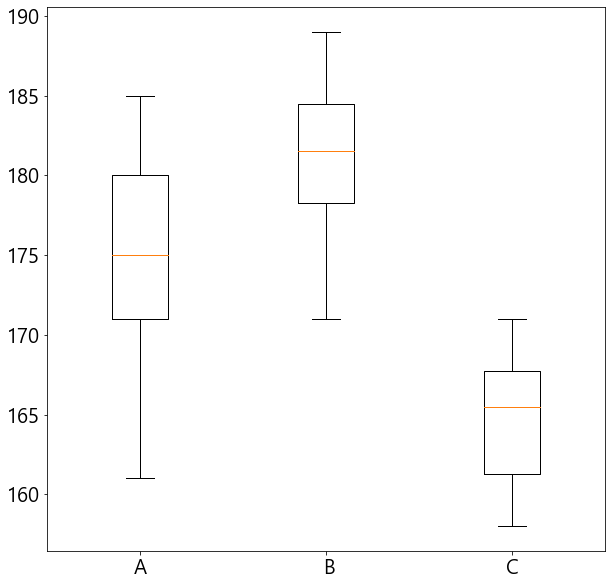

In [27]:
# 박스플롯으로 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['A', ' B', 'C'])

In [28]:
## 정규성 검정 : 세변수 모두 정규성이 있는지 확인
from scipy.stats import *
print(kstest(A,'norm'))
print(kstest(B,'norm'))
print(kstest(C,'norm'))


KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [29]:
##  등분산 검정
levene(A,B,C) #pvalue=0.3298350736340699

LeveneResult(statistic=1.1578544061302678, pvalue=0.3298350736340699)

In [30]:
## ANOVA 검정 수행
print(f_oneway(A,B,C)) #pvalue=1.1399440916100489e-05 대립가설 채택

F_onewayResult(statistic=18.20204645258331, pvalue=1.1399440916100489e-05)


In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] *len(A) + ['B'] *len(B) + ['C'] *len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data,Group)) #Data 와 Group의 길이가 같아야 함

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   6.2222 0.0812  -0.6432 13.0876  False
     A      C  -9.8778 0.0039 -16.7432 -3.0124   True
     B      C    -16.1  0.001 -22.7823 -9.4177   True
-----------------------------------------------------
